In [10]:
from skimage import io, measure
from skimage.color import rgb2gray
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [26]:
dataset_path = '../../data/vehicle-type-detection/'
fixed_path = '../../data/vehicle-type-detection/suv/PIC_78.jpg'


def select_random_image():
    categories = ['hatchback', 'motorcycle', 'pickup', 'sedan', 'suv']
    
    selected_category = random.choice(categories)
    
    category_path = os.path.join(dataset_path, selected_category)
    
    image_files = os.listdir(category_path)
    
    selected_image = random.choice(image_files)
    
    image_path = os.path.join(category_path, selected_image)
    
    print(image_path)
    return image_path

../../data/vehicle-type-detection/suv/PIC_78.jpg


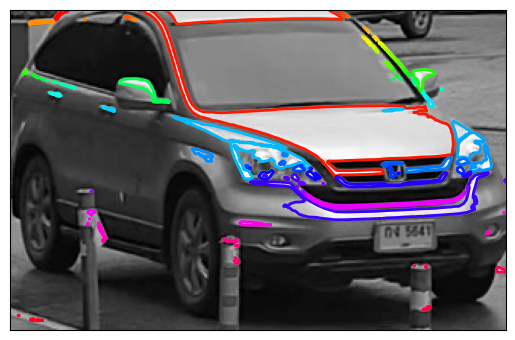

In [80]:
# Load and preprocess the image (convert to grayscale)
image = rgb2gray(io.imread(fixed_path))
# image = rgb2gray(io.imread(select_random_image()))

# Find contours at a constant intensity value
contours = measure.find_contours(image, 0.7)

# Generate a list of unique colors for each contour
colors = plt.get_cmap('hsv', len(contours))

# Display the image and plot all contours with different colors
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for i, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color=colors(i))


ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [81]:

# Calculate statistics for each contour: area and perimeter
def calculate_contour_stats(contours, image_shape):
    num_contours = len(contours)
    print(f"Number of contours detected: {num_contours}")
    
    areas = []
    perimeters = []
    
    for contour in contours:
        # Approximate area and perimeter
        area = measure.grid_points_in_poly(image_shape, contour).sum()
        perimeter = np.sum(np.sqrt(np.diff(contour[:, 1])**2 + np.diff(contour[:, 0])**2))
        
        areas.append(area)
        perimeters.append(perimeter)
    
    print(f"Contour Areas: {areas}")
    print(f"Contour Perimeters: {perimeters}")

# Call the function to display contour statistics
calculate_contour_stats(contours, image.shape)

Number of contours detected: 138
Contour Areas: [np.int64(17), np.int64(1), np.int64(4422), np.int64(749), np.int64(2), np.int64(1), np.int64(1), np.int64(1), np.int64(3), np.int64(1), np.int64(2), np.int64(1), np.int64(2), np.int64(24), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(5), np.int64(1), np.int64(3), np.int64(1), np.int64(1), np.int64(1), np.int64(3), np.int64(4), np.int64(1), np.int64(1), np.int64(3), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(3), np.int64(9), np.int64(6), np.int64(1), np.int64(5), np.int64(1), np.int64(4), np.int64(88), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(2), np.int64(2), np.int64(130), np.int64(1), np.int64(1), np.int64(1), np.int64(3), np.int64(3), np.int64(1), np.int64(1), np.int64(2), np.int64(3), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(9), np.int64(1), np.int64(1), np.int64(1), np.in